<a href="https://colab.research.google.com/github/jrgreen7/SYSC4906/blob/master/W2025/Assignments/A1/SYSC4415_W25_A1.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Required Setup for local Running if you are not using Google Colab

Install [Anaconda distribution] (https://docs.anaconda.com/anaconda/install/)

If you don't have Python on your computer, you can use the [Anaconda Python distribution](http://continuum.io/downloads) to install most of the Python packages you need. Anaconda provides a simple double-click installer for your convenience.

This notebook uses several Python packages that come standard with the Anaconda Python distribution. The primary libraries that we'll be using are:

* **NumPy**: Provides a fast numerical array structure and helper functions.
* **pandas**: Provides a DataFrame structure to store data in memory and work with it easily and efficiently.
* **scikit-learn/sklearn**: The essential Machine Learning package in Python.
* **matplotlib**: Basic plotting library in Python; most other Python plotting libraries are built on top of it.
* **Seaborn**: Advanced statistical plotting library.
* **waterqmark**: A Jupyter Notebook extension for printing timestamps, version numbers, and hardware information.

To make sure you have all of the packages you need, install them with `conda`:

```
conda create -n SYSC4415_tutorials python=3.11
conda activate SYSC4415_tutorials

conda install jupyter
conda install numpy pandas scikit-learn matplotlib seaborn graphviz statsmodels
conda install -c conda-forge watermark

```

`conda` may ask you to update some of them if you don't have the most recent version. Allow it to do so.

## NOTE about Signature in Google Colab:

Use `!pip install watermark` in Google Colab if you have errors while signing your notebook. If you work locally and follow the instructions above in the correct order, it should be already installed.

## General Instructions:

Please print out values when asked using Python's print() function with f-strings where possible.

Submit your saved notebook with all the outputs to Brightspace, but make sure that it will produce correct outputs upon restarting and click "runtime" → "run all" with clean outputs. Ensure your notebook displays all answers when this is clicked.

## Your Submission MUST contain your signature at the bottom.


In [1]:
# Name: Rama Alkhouli
# Student Number: 101198025

In [2]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
import graphviz

## Section 1: Gradients (4 marks)
Hint: use attached PDF if you get lost.

In [3]:
"""
Q1a (1 mark)
- Manually derive and calculate the gradient of the function: f(x,y,z) = e^(x²) + y^y + e^(xy) + zcos(x) at point (0,1, 1)
- Show each component of the gradient.

Print your answer using print() function showing all three partial derivatives.
"""

print(f"∂f/∂x at (0,1,1): {1}")
print(f"∂f/∂y at (0,1,1): {1}")
print(f"∂f/∂z at (0,1,1): {1}")


∂f/∂x at (0,1,1): 1
∂f/∂y at (0,1,1): 1
∂f/∂z at (0,1,1): 1


In [4]:
"""
Q1b (1 mark)
For each component of the gradient calculated in Q1a:
- Explain what the value means geometrically
- Provide a conclusion about each term and gradient in general
"""
print("""Q1b: Geometric Interpretation of the Gradient

The gradient ∇f(0,1,1) = (1,1,1) represents the direction of the steepest ascent at the point (0,1,1).

- ∂f/∂x = 1 → The function increases by 1 per unit increase in x.
- ∂f/∂y = 1 → The function increases by 1 per unit increase in y.
- ∂f/∂z = 1 → The function increases by 1 per unit increase in z.

Since all components are equal, the function grows uniformly in all directions at this point.
The gradient vector (1,1,1) points in the direction of the steepest increase of f(x,y,z).""")



Q1b: Geometric Interpretation of the Gradient

The gradient ∇f(0,1,1) = (1,1,1) represents the direction of the steepest ascent at the point (0,1,1).

- ∂f/∂x = 1 → The function increases by 1 per unit increase in x.
- ∂f/∂y = 1 → The function increases by 1 per unit increase in y.
- ∂f/∂z = 1 → The function increases by 1 per unit increase in z.

Since all components are equal, the function grows uniformly in all directions at this point.
The gradient vector (1,1,1) points in the direction of the steepest increase of f(x,y,z).


In [5]:
"""
Q1c (2 marks)
Write a Python function to verify your gradient calculation numerically:
1. Implement the function f(x,y,z)
2. Calculate numerical approximations of partial derivatives using small perturbations
3. Compare your analytical results from Q1a with numerical approximations
4. Report the result of function evaluation at the point (0,1,1)
"""

# Define the function f(x, y, z)
def f(x, y, z):
    return np.exp(x**2) + y**y + np.exp(x*y) + z * np.cos(x)

def verify_gradient(f, x, y, z, h=1e-5):
    # Analytical gradient values from Q1a
    grad_analytical = (1, 1, 1)

    # Compute numerical gradient using finite differences
    df_dx = (f(x + h, y, z) - f(x - h, y, z)) / (2 * h)
    df_dy = (f(x, y + h, z) - f(x, y - h, z)) / (2 * h)
    df_dz = (f(x, y, z + h) - f(x, y, z - h)) / (2 * h)
    grad_numerical = (df_dx, df_dy, df_dz)

    # Evaluate function at (x, y, z)
    function_value = f(x, y, z)

    print(f"Analytical Gradient: {grad_analytical}")
    print(f"Numerical Gradient: {grad_numerical}")
    print(f"Function value at ({x},{y},{z}): {function_value}")

    return grad_analytical, grad_numerical, function_value

# Call the function to verify the gradient at (0,1,1)
verify_gradient(f, 0, 1, 1)


Analytical Gradient: (1, 1, 1)
Numerical Gradient: (np.float64(0.9999999999843466), np.float64(1.0000000000509601), np.float64(0.9999999999843466))
Function value at (0,1,1): 4.0


((1, 1, 1),
 (np.float64(0.9999999999843466),
  np.float64(1.0000000000509601),
  np.float64(0.9999999999843466)),
 np.float64(4.0))

## Section 2: Data Analysis (8 marks)

This section uses the Palmer Penguins dataset, which contains measurements from three penguin species.
The dataset includes physical measurements like bill length, bill depth, flipper length, and body mass. We are building a penguin classifier. First we need to assess out data.

In [6]:
"""
Q2a (1 mark)
✅ Load the Palmer Penguins dataset using Seaborn's load_dataset (provided)
- Show that it contains valid data
- Create variables for numerical features and labels
- Perform basic statistical analysis by printing the general statistics table as in Tutorials. 
- Find missing values and drop records with missing values for any feature
- Save entries with missing values for "sex" in a separate variable, we'll use it later.
"""

# Load data
penguins = sb.load_dataset("penguins")

# Show first few rows to confirm it contains valid data
print("First five rows of the dataset:")
print(penguins.head())

# Create variables for numerical features and labels
numerical_features = penguins.select_dtypes(include=['number']).columns.tolist()
labels = "species"

# Perform basic statistical analysis
print("\nBasic Statistics:")
print(penguins.describe())

# Find missing values
missing_values = penguins.isnull().sum()
print("\nMissing Values per Column:")
print(missing_values)

# Save entries with missing values for "sex" in a separate variable
missing_sex_entries = penguins[penguins["sex"].isnull()]

# Drop records with missing values
penguins_cleaned = penguins.dropna()

First five rows of the dataset:
  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  

Basic Statistics:
       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      342.000000     342.000000         342.000000   342.000000
mean        43.921930      17.151170         200.915205  4201.754386
std          5.459584       1.974793          14.061714   801.954536
min         32.100000      13.100000         172.000000  2700.000000
25%      

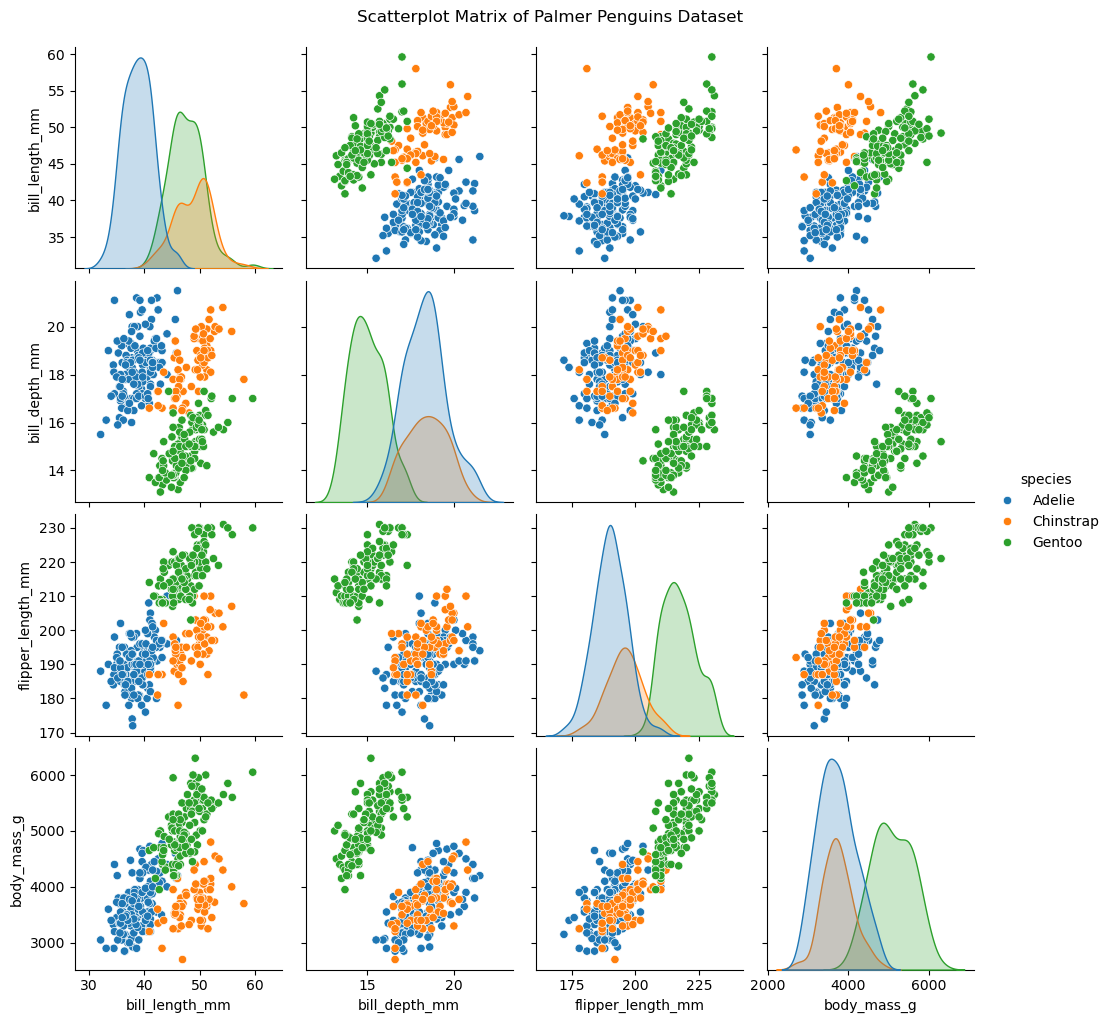

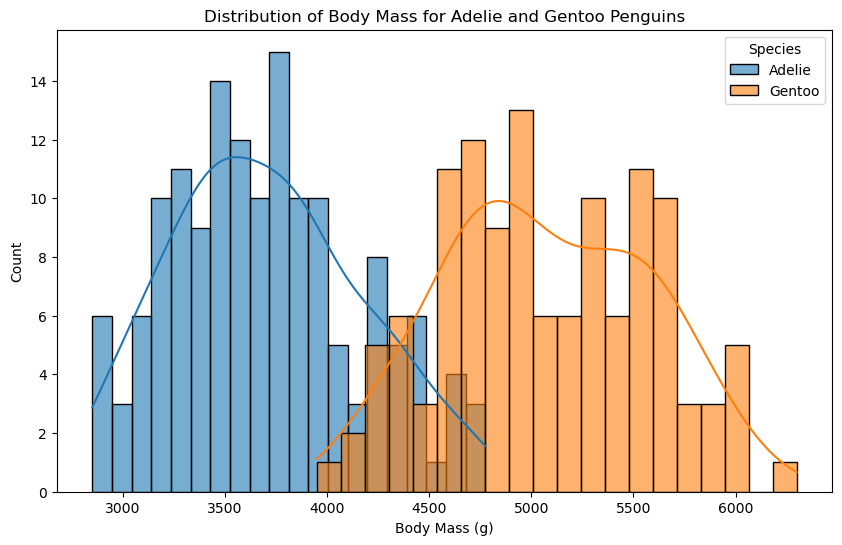

In [7]:
"""
Q2b (2 marks)
Create visualizations showing:
- Create scatterplot matrix for visual assessment of data
- Identify one feature with outliers and show distribution values for two classes (2 histograms).
"""

# Scatterplot matrix
sb.pairplot(penguins.dropna(), hue="species", diag_kind="kde")
plt.suptitle("Scatterplot Matrix of Palmer Penguins Dataset", y=1.02)
plt.show()

# Feature with outliers
feature_with_outliers = "body_mass_g"

# Plot histograms for two species
species_to_compare = ["Adelie", "Gentoo"]
plt.figure(figsize=(10, 6))
for species in species_to_compare:
    sb.histplot(
        penguins[penguins["species"] == species][feature_with_outliers].dropna(),
        kde=True, label=species, bins=20, alpha=0.6,
    )

plt.xlabel("Body Mass (g)")
plt.ylabel("Count")
plt.title("Distribution of Body Mass for Adelie and Gentoo Penguins")
plt.legend(title="Species")
plt.show()


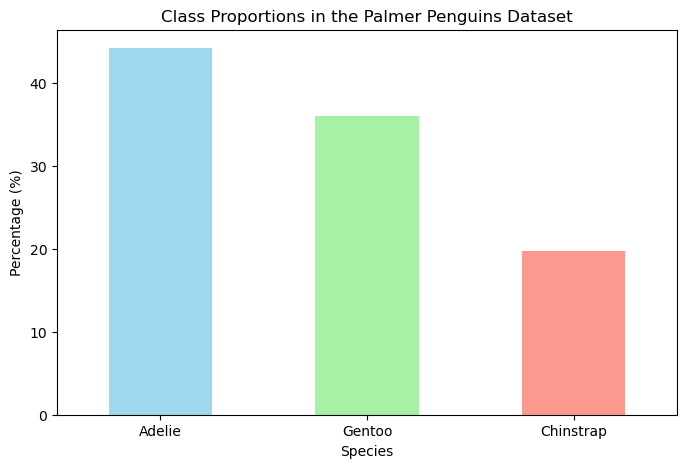

Class Counts:
species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

Class Proportions (%):
species
Adelie       44.186047
Gentoo       36.046512
Chinstrap    19.767442
Name: proportion, dtype: float64

Analysis:
- Class proportions are visualized in the bar plot above.
- The smallest class proportion is 19.77%, which corresponds to the 'Chinstrap' species.
- If the smallest class proportion is significantly lower than others, it may lead to class imbalance issues.
- Consider strategies like oversampling the 'Chinstrap' species or using a class-weighted loss to address imbalance during training.



In [8]:
"""
Q2c (1 mark)
Analyze class distribution and discuss implications for model training:
- Calculate and visualize class proportions
- Identify any class imbalance
"""

# Analyze class proportions
class_counts = penguins["species"].value_counts()
class_proportions = penguins["species"].value_counts(normalize=True) * 100

# Visualize class proportions
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
class_proportions.plot(kind="bar", color=["skyblue", "lightgreen", "salmon"], alpha=0.8)
plt.title("Class Proportions in the Palmer Penguins Dataset")
plt.ylabel("Percentage (%)")
plt.xlabel("Species")
plt.xticks(rotation=0)
plt.show()

# Print class proportions
print("Class Counts:")
print(class_counts)
print("\nClass Proportions (%):")
print(class_proportions)

# Analysis
print(f"""
Analysis:
- Class proportions are visualized in the bar plot above.
- The smallest class proportion is {class_proportions.min():.2f}%, which corresponds to the '{class_proportions.idxmin()}' species.
- If the smallest class proportion is significantly lower than others, it may lead to class imbalance issues.
- Consider strategies like oversampling the '{class_proportions.idxmin()}' species or using a class-weighted loss to address imbalance during training.
""")


## Section 3: Model Development (8 marks)
After polishing thedata, let's make our classification model.

In [9]:
"""
Q3a (2 marks)
Preprocess the data:
- Use the clean dataset from Q2a (with missing values removed)
- Split into training (80%) and test (20%) sets using random_state=42
- Print first 5 rows of training data with their species labels
- Print shapes of both datasets
- Show number of samples per species in each split
"""
# Separate features and labels
X = penguins_cleaned.drop(columns=["species"])
y = penguins_cleaned["species"]

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print first 5 rows of training data with their species labels
print("First 5 rows of training data (features and labels):")
print(X_train.head())
print(y_train.head())

# Print shapes of the datasets
print("\nShapes of datasets:")
print(f"Training set: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set: X_test={X_test.shape}, y_test={y_test.shape}")

# Show number of samples per species in each split
print("\nNumber of samples per species in each split:")
print("Training set:")
print(y_train.value_counts())
print("\nTest set:")
print(y_test.value_counts())


First 5 rows of training data (features and labels):
        island  bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
268     Biscoe            44.9           13.3              213.0       5100.0   
205      Dream            50.7           19.7              203.0       4050.0   
337     Biscoe            48.8           16.2              222.0       6000.0   
123  Torgersen            41.4           18.5              202.0       3875.0   
38       Dream            37.6           19.3              181.0       3300.0   

        sex  
268  Female  
205    Male  
337    Male  
123    Male  
38   Female  
268       Gentoo
205    Chinstrap
337       Gentoo
123       Adelie
38        Adelie
Name: species, dtype: object

Shapes of datasets:
Training set: X_train=(266, 6), y_train=(266,)
Test set: X_test=(67, 6), y_test=(67,)

Number of samples per species in each split:
Training set:
species
Adelie       117
Gentoo        95
Chinstrap     54
Name: count, dtype: int64

Test set:

Training Accuracy: 1.00
Test Accuracy: 0.96

Cross-Validation Mean Score: 0.97
Cross-Validation Score Std Dev: 0.02


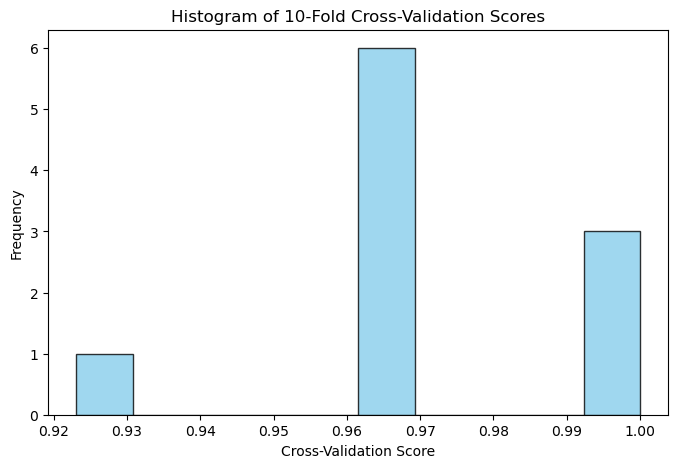


The histogram shows the distribution of cross-validation scores across 10 folds. 
If the scores are tightly grouped, it indicates consistent model performance. 
If the scores vary significantly, the model may be sensitive to the data splits.



In [10]:
"""
Q3b (3 marks)
Train and evaluate a Decision Tree:
1. Create a Decision Tree with default parameters (random_state=42)
2. Evaluate the model:
   - Fit on training data (numerical features only)
   - Print training and test accuracy score for this tree
   - Perform 10-fold cross-validation
   - Print mean and std of cross-validation scores and build cv_scores histogram. 
   - What does the histogram show?
"""

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

#Use only numerical features
numerical_features = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]
X_train_num = X_train[numerical_features]
X_test_num = X_test[numerical_features]

# Create a Decision Tree with default parameters
tree_model = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
tree_model.fit(X_train_num, y_train)

# Evaluate the model
train_accuracy = accuracy_score(y_train, tree_model.predict(X_train_num))
test_accuracy = accuracy_score(y_test, tree_model.predict(X_test_num))

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

# Perform 10-fold cross-validation
cv_scores = cross_val_score(tree_model, X_train_num, y_train, cv=10)

# Print mean and standard deviation of cross-validation scores
print(f"\nCross-Validation Mean Score: {np.mean(cv_scores):.2f}")
print(f"Cross-Validation Score Std Dev: {np.std(cv_scores):.2f}")

# Build histogram of cross-validation scores
plt.figure(figsize=(8, 5))
plt.hist(cv_scores, bins=10, color="skyblue", alpha=0.8, edgecolor="black")
plt.title("Histogram of 10-Fold Cross-Validation Scores")
plt.xlabel("Cross-Validation Score")
plt.ylabel("Frequency")
plt.show()

# Comment on the histogram
print("""
The histogram shows the distribution of cross-validation scores across 10 folds. 
If the scores are tightly grouped, it indicates consistent model performance. 
If the scores vary significantly, the model may be sensitive to the data splits.
""")


Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best Cross-Validation Score: 0.98


C:\Users\ramaa\AppData\Local\Temp\ipykernel_13372\1824593375.py:51: FutureWarning: The provided callable <function mean at 0x000001AF2B4E7920> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot_table = results.pivot_table(


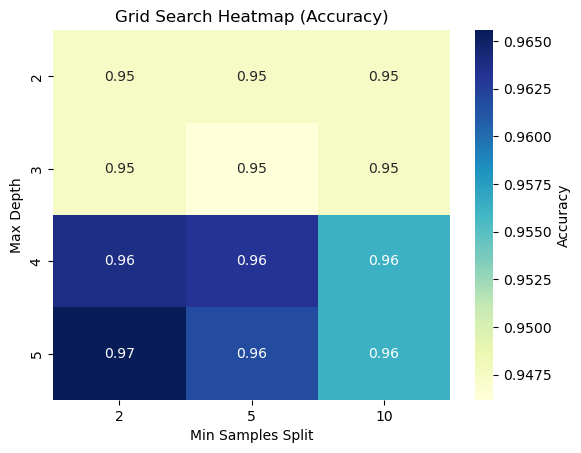

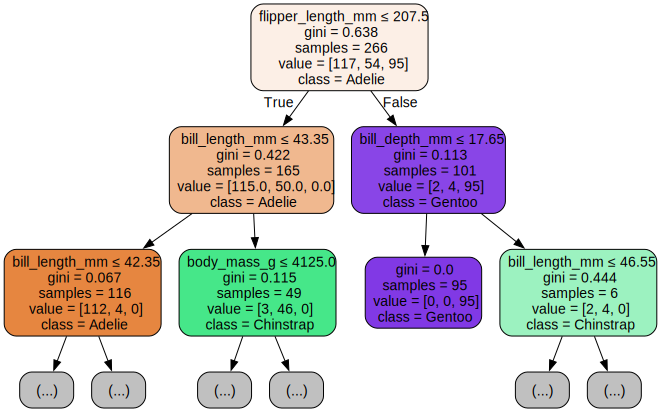

In [11]:
"""
Q3c (3 marks)
Analyze the best model from grid search:
- Initialize parameter_grid, cross_validation using StratifiedKFold
- Identify the best parameters for the tree and show the grid heatmap (don't forget labels)
- Plot the best tree structure using graphviz, use max_depth=2 (for better display)

Note: when using export_graphviz set out_file=None and use display(graph) function call, where 
graph is your variable instantiated with Source(dot_data)   
Export_graphviz Documentation: https://scikit-learn.org/1.5/modules/generated/sklearn.tree.export_graphviz.html
"""
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

import graphviz
from sklearn.tree import export_graphviz
from graphviz import Source

# Define the parameter grid
parameter_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4, 5, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize StratifiedKFold
stratified_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create a Decision Tree Classifier
tree_model = DecisionTreeClassifier(random_state=42)

# Perform GridSearchCV
grid_search = GridSearchCV(
    estimator=tree_model,
    param_grid=parameter_grid,
    scoring='accuracy',
    cv=stratified_cv,
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_train_num, y_train)

# Extract best parameters and results
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Score: {grid_search.best_score_:.2f}")

# Create a heatmap for visualization of cross-validation scores
results = pd.DataFrame(grid_search.cv_results_)
pivot_table = results.pivot_table(
    values="mean_test_score",
    index="param_max_depth",
    columns="param_min_samples_split",
    aggfunc=np.mean
)

sb.heatmap(pivot_table, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Accuracy'})
plt.title("Grid Search Heatmap (Accuracy)")
plt.xlabel("Min Samples Split")
plt.ylabel("Max Depth")
plt.show()

# Plot the best tree structure using graphviz with max_depth=2
best_tree = grid_search.best_estimator_
dot_data = export_graphviz(
    best_tree,
    out_file=None,
    feature_names=numerical_features,
    class_names=best_tree.classes_,
    filled=True,
    rounded=True,
    special_characters=True,
    max_depth=2
)
graph = Source(dot_data)
display(graph)


## Section 4: Missing_Sex Prediction (4 marks)
In this part of the assignment, we are building a model to infer the missing values from the original dataset to fix the broken records.


In [12]:
"""
Q4a (2 marks)
Prepare data for sex prediction:
- Use the clean dataset (no missing values) from Section 2
- Convert species to numeric values.

Note: Unlike the example in the tutorial, we will use a more straightforward method, LabelEncoder().

For this task, you just need to instantiate it, use the fit_transform method on the "species" column,
and reassign or add the column. 
See documentation for details:
https://scikit-learn.org/dev/modules/generated/sklearn.preprocessing.LabelEncoder.html

- Create new feature/label split using "sex" as target
- Scale features using StandardScaler().fit_transform(features) as in Tutorial
See documentation: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

- Split data into training (80%) and test (20%) sets
- Train these classifiers:
  * Logistic Regression (solver='lbfgs')
  * Decision Tree (max_depth=3)
  * KNN (n_neighbors=5)
  * SVM (kernel="linear", C=0.025)
- Compare models using (Providing values for each would be enough):
  * Training and test accuracy
  * 10-fold cross-validation scores


"""

# Prepare features including species as numeric
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Encode species as numeric
label_encoder = LabelEncoder()
penguins_cleaned["species_encoded"] = label_encoder.fit_transform(penguins_cleaned["species"])

# Prepare features and labels for "sex" prediction
features = penguins_cleaned.drop(columns=["sex", "species", "species_encoded"])
labels = penguins_cleaned["sex"]

# Scale features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features.select_dtypes(include=['float64', 'int64']))

# Split data into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(scaled_features, labels, test_size=0.2, random_state=42, stratify=labels)

# Initialize classifiers
models = {
    "Logistic Regression": LogisticRegression(solver='lbfgs', random_state=42, max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(max_depth=3, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel="linear", C=0.025, random_state=42)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    cv_scores = cross_val_score(model, X_train, y_train, cv=10)
    
    results[name] = {
        "Training Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy,
        "CV Mean Score": cv_scores.mean(),
        "CV Std Dev": cv_scores.std()
    }

# Display results
for model_name, metrics in results.items():
    print(f"\nModel: {model_name}")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.2f}")



C:\Users\ramaa\AppData\Local\Temp\ipykernel_13372\4146242149.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penguins_cleaned["species_encoded"] = label_encoder.fit_transform(penguins_cleaned["species"])



Model: Logistic Regression
Training Accuracy: 0.91
Test Accuracy: 0.88
CV Mean Score: 0.90
CV Std Dev: 0.05

Model: Decision Tree
Training Accuracy: 0.94
Test Accuracy: 0.84
CV Mean Score: 0.91
CV Std Dev: 0.05

Model: KNN
Training Accuracy: 0.95
Test Accuracy: 0.93
CV Mean Score: 0.91
CV Std Dev: 0.04

Model: SVM
Training Accuracy: 0.89
Test Accuracy: 0.88
CV Mean Score: 0.89
CV Std Dev: 0.06


In [13]:
"""
Q4b (2 marks)
Use best model to predict missing sex:
- Make sure to create new variable for subset to work with and copy your variable with missing records into it,
using new_var = your_variable.copy().
- Print records with missing sex values from section 2.
- Remove records that have missing values other than sex using dropna: df.dropna(subset=['column_name'],inplace=True).
- Scale features using StandardScaler().fit_transform(features) as in Q3
- Create new features/labels variables for the new dataset. 

- Select best classifier based on test performance from Q4a

- For each record in missing_sex dataset, using best_model.predict(features) and best_model.predict_proba(features)
- Add missing values to the clean dataset and make sure there are no missing values.
"""
# Copy the variable with missing sex records
missing_sex = missing_sex_entries.copy()

# Print records with missing sex values
print("Records with missing 'sex' values:")
print(missing_sex)

# Remove records with missing values other than 'sex'
missing_sex.dropna(subset=numerical_features, inplace=True)

# Scale features using StandardScaler
scaled_missing_sex_features = scaler.transform(
    missing_sex[numerical_features].select_dtypes(include=['float64', 'int64'])
)

# Select the best model (KNN in this case based on Q4a results)
best_model = KNeighborsClassifier(n_neighbors=5)
best_model.fit(X_train, y_train)

# Predict missing sex values
predicted_sex = best_model.predict(scaled_missing_sex_features)
predicted_probabilities = best_model.predict_proba(scaled_missing_sex_features)

# Add predictions back to the clean dataset
missing_sex["sex"] = predicted_sex

# Update the clean dataset by appending the imputed values
updated_penguins = pd.concat([penguins_cleaned, missing_sex], ignore_index=True)

# Ensure there are no missing values
print("\nUpdated dataset - Missing values:")
print(updated_penguins.isnull().sum())

# Display predicted values for verification
print("\nPredicted 'sex' for missing records:")
print(missing_sex[["sex"]])



Records with missing 'sex' values:
    species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
3    Adelie  Torgersen             NaN            NaN                NaN   
8    Adelie  Torgersen            34.1           18.1              193.0   
9    Adelie  Torgersen            42.0           20.2              190.0   
10   Adelie  Torgersen            37.8           17.1              186.0   
11   Adelie  Torgersen            37.8           17.3              180.0   
47   Adelie      Dream            37.5           18.9              179.0   
246  Gentoo     Biscoe            44.5           14.3              216.0   
286  Gentoo     Biscoe            46.2           14.4              214.0   
324  Gentoo     Biscoe            47.3           13.8              216.0   
336  Gentoo     Biscoe            44.5           15.7              217.0   
339  Gentoo     Biscoe             NaN            NaN                NaN   

     body_mass_g  sex  
3            NaN  NaN  
8   

#### Congratulations! What you just did is called **model-based multiple imputation**. It is one of the methods used to treat missing data.

## Signature:
Don't forget to insert your name and student number and execute.

In [14]:
# Provide your Signarure:
%reload_ext watermark
%watermark -a "Rama Alkhouli" -nmv --packages numpy,pandas,sklearn,matplotlib,seaborn,graphviz

Author: Rama Alkhouli

Python implementation: CPython
Python version       : 3.11.11
IPython version      : 8.30.0

numpy     : 2.2.2
pandas    : 2.2.3
sklearn   : 1.6.1
matplotlib: 3.10.0
seaborn   : 0.13.2
graphviz  : 0.20.3

Compiler    : MSC v.1929 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 140 Stepping 1, GenuineIntel
CPU cores   : 8
Architecture: 64bit

